In [1]:
from easygui.boxes.choice_box import make_list_or_none
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import easygui as gui
import tkinter as tk
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
# from sklearn.manifold import TSNE 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline


Address data

In [2]:
df = pd.read_csv('heart.csv')
'''
The features in the data set incluses
    Age: age of the patient [years]
    Sex: sex of the patient [1: Male, 0: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality 
                (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable 
                or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [1: Yes, 0: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
'''
df.info()
df.head(10)
new_df = pd.DataFrame(columns=['Age','Sex',	'ChestPainType_TA','ChestPainType_ATA','ChestPainType_ASY',
                            'ChestPainType_NAP','RestingBP','Cholesterol','FastingBS','RestingECG_Normal',
                            'RestingECG_ST','RestingECG_LVH','MaxHR','ExerciseAngina','Oldpeak','ST_Slope_Up',
                            'ST_Slope_Flat','ST_Slope_Down','HeartDisease'])
new_df['Age']=df['Age']
new_df['Sex']=df['Sex']
new_df['ChestPainType_TA']=df['ChestPainType']
new_df['ChestPainType_ATA']=df['ChestPainType']
new_df['ChestPainType_ASY']=df['ChestPainType']
new_df['ChestPainType_NAP']=df['ChestPainType']
new_df['RestingBP']=df['RestingBP']
new_df['Cholesterol']=df['Cholesterol']
new_df['FastingBS']=df['FastingBS']
new_df['RestingECG_Normal']=df['RestingECG']
new_df['RestingECG_ST']=df['RestingECG']
new_df['RestingECG_LVH']=df['RestingECG']
new_df['MaxHR']=df['MaxHR']
new_df['ExerciseAngina']=df['ExerciseAngina']
new_df['Oldpeak']=df['Oldpeak']
new_df['ST_Slope_Up']=df['ST_Slope']
new_df['ST_Slope_Flat']=df['ST_Slope']
new_df['ST_Slope_Down']=df['ST_Slope']
new_df['HeartDisease']=df['HeartDisease']

new_df['Sex'].replace(['M','F'],[1.0, 0.0], inplace = True)
new_df['ChestPainType_TA'].replace(['TA','ATA','ASY','NAP'],[1.0, 0.0, 0.0, 0.0], inplace = True)
new_df['ChestPainType_ATA'].replace(['TA','ATA','ASY','NAP'],[0.0, 1.0, 0.0, 0.0], inplace = True)
new_df['ChestPainType_ASY'].replace(['TA','ATA','ASY','NAP'],[0.0, 0.0, 0.1, 0.0], inplace = True)
new_df['ChestPainType_NAP'].replace(['TA','ATA','ASY','NAP'],[0.0, 0.0, 0.0, 1.0], inplace = True)
new_df['RestingECG_Normal'].replace(['Normal','ST','LVH'],[1.0, 0.0, 0.0], inplace = True)
new_df['RestingECG_ST'].replace(['Normal','ST','LVH'],[0.0, 1.0, 0.0], inplace = True)
new_df['RestingECG_LVH'].replace(['Normal','ST','LVH'],[0.0, 0.0, 1.0], inplace = True)
new_df['ExerciseAngina'].replace(['Y','N'],[1.0, 0.0], inplace = True)
new_df['ST_Slope_Up'].replace(['Up','Flat','Down'],[1.0, 0.0, 0.0], inplace = True)
new_df['ST_Slope_Flat'].replace(['Up','Flat','Down'],[0.0, 1.0, 0.0], inplace = True)
new_df['ST_Slope_Down'].replace(['Up','Flat','Down'],[0.0, 0.0, 1.0], inplace = True)

# new_df.info()
new_df.head(10)
# print(new_df)

new_df.to_csv('heart_data_addressed.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Prediction Assessment

In [3]:
def plot_confusion_matrix(y_test, y_pred):
   
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large') 
    plt.xlabel('Predictions', fontsize=14)
    plt.ylabel('Actuals', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    return None

def ROC_curve(y_test, y_pred_prob):
    fpr, tpr, threholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    print(fpr,tpr,threholds)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def Scores(y_test,y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    print('ROC-AUC Score: %.3f' % roc_auc_score(y_test, y_pred))
    return None

def PR_curve(y_test, y_pred_prob):
    precision, recall, _= precision_recall_curve(y_test, y_pred)
    print(precision,recall)
    plt.plot(recall, precision, marker='.', label='Logistic')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Comparison of classification models (PRC)')
    plt.legend()
    plt.show()

Logistic Regression 

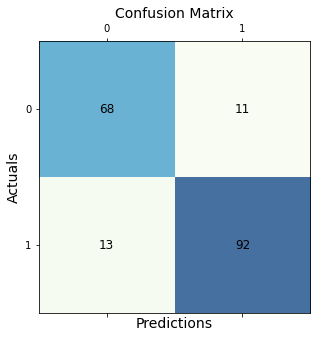

[0.         0.13924051 1.        ] [0.         0.87619048 1.        ] [2 1 0]


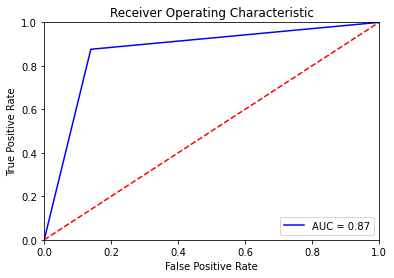

[0.57065217 0.89320388 1.        ] [1.         0.87619048 0.        ]


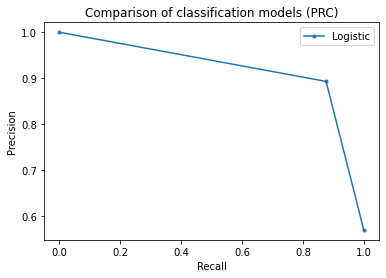

Precision: 0.893
Recall: 0.876
Accuracy: 0.870
F1 Score: 0.885
ROC-AUC Score: 0.868


In [4]:
dataset = new_df
X = dataset.drop(['HeartDisease'], axis=1)
Y = dataset['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)
lr=LogisticRegression(class_weight="balanced")
lr.fit(x_train,y_train)
#利用训练模型进行预测
y_pred_prob = lr.predict_proba(x_test)
y_pred=lr.predict(x_test)
# res2 = lr.fit()
# res2.summary()
plot_confusion_matrix(y_test,y_pred)
ROC_curve(y_test, y_pred_prob)
PR_curve(y_test, y_pred_prob)
Scores(y_test,y_pred)

In [5]:
%matplotlib inline
gui.msgbox('test')
model_choice = gui.choicebox(msg='Which models would you like to use ', title=' Heart Failure Prediction', choices=['Logistic Regression','Randomforest','Desision Tree','Gaussian Naive Bayes'])
features = ['Age','Sex','ChestPainType(TA,ATA,ASY,NAP)','RestingBP','Cholesterol','FastingBS','RestingECG(Normal,ST,LVH)','MaxHR','ExerciseAngina','Oldpeak','ST_Slope(Up,Flat,Down)']
patience_information = gui.multenterbox(msg=' Please input patient information', title=' Heart Failure Prediction', fields=features, values=[])
print(patience_information)
print(model_choice)


None
None
